In [7]:
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_excel('DermstoreSerumsRawData.xlsx', sheet_name = "CleanData")


In [11]:
df_csv = df.to_csv('DermstoreSerumsRawData.xlsx', index=False)

In [18]:
df_csv = pd.read_csv('DermstoreSerumsRawData.xlsx')
df_csv.head()

,Brand,ProductName,Size(ml),PriceInDollars,Rating,ApplicationArea,SkinType,IdealForConcerns,Preferences,MainIngredients,AllIngredients,HowToUse
0,AlliesOfSkin,Allies of Skin 35% Vitamin C Perfecting Serum,30,118.00,4.35,Face,"Acne-Prone Skin, Combination Skin, Dry Skin, M...","Acne, Aging Skin, Free Radical Damage, Hyperpi...","Certified Cruelty-Free, Clean, Fragrance-Free,...","Antioxidants, Vitamin C","Ethoxydiglycol, 3-O-Ethyl Ascorbic Acid, Tetra...","After cleansing and toning, apply all over fac..."
1,Avene,Avene Hydrance Intense Rehydrating Serum,30,38.00,4.31,"Face, Neck","Acne-Prone Skin, Combination Skin, Dry Skin, M...","Aging Skin, Dryness and Dehydration","Clean, Dermatologist Approved, Hypoallergenic,...",NaN,"Avène Thermal Spring Water (Avène Aqua), Capry...","Apply morning and/or evening to the face, neck..."
2,BeautyStat,BeautyStat Universal C Skin Refiner,30,80.00,4.33,Face,"Acne-Prone Skin, Combination Skin, Dry Skin, M...","Dryness and Dehydration, Hyperpigmentation, La...","Fragrance-Free, Gluten-Free, Phthalate-Free, V...","Green Tea, Squalane Oil, Vitamin C","Cyclopentasiloxane, L-Ascorbic Acid (Pure Vita...","Smooth over cleansed, dry skin, AM and PM. For..."
3,Bioderma,Bioderma Hydrabio Serum,40,27.99,4.47,"Cheeks, Decollete, Face, Neck","Dry Skin, Sensitive Skin",Dryness and Dehydration,"Clean, Hypoallergenic",Niacinamide,"Water, glycerin, xylitol, sodium polyacrylate,...",Apply onto the face and neck in the morning an...
4,ByTerry,By Terry Brightening CC Serum,30,91.00,4.76,Face,NaN,"Dryness and Dehydration, Redness",NaN,NaN,"Aqua / Water, Glycereth-7, Bis-Peg-18 Methyl E...",Apply as a primer on bare skin. Wear alone or ...


In [19]:
df_csv.columns

Index(['Brand', 'ProductName', 'Size(ml)', 'PriceInDollars', 'Rating',
       'ApplicationArea', 'SkinType', 'IdealForConcerns', 'Preferences',
       'MainIngredients', 'AllIngredients', 'HowToUse'],
      dtype='object')

In [31]:
df_csv = df_csv.rename(columns={'Size(ml)':'Size'})

In [32]:
df_csv.columns

Index(['Brand', 'ProductName', 'Size', 'PriceInDollars', 'Rating',
       'ApplicationArea', 'SkinType', 'IdealForConcerns', 'Preferences',
       'MainIngredients', 'AllIngredients', 'HowToUse'],
      dtype='object')

In [36]:
df_csv['Size'].value_counts()

30    37
50     3
40     1
20     1
35     1
Name: Size, dtype: int64

In [37]:
df_csv['ApplicationArea'].value_counts()

Face                             22
Decollete, Face, Neck            13
Face, Neck                        4
Cheeks, Decollete, Face, Neck     1
Decollete, Face, Hands, Neck      1
Decollete, Face                   1
Name: ApplicationArea, dtype: int64

In [40]:
df_csv['SkinType'].value_counts()

Acne-Prone Skin, Combination Skin, Dry Skin, Mature Skin, Normal Skin, Oily Skin, Sensitive Skin    28
Combination Skin, Dry Skin, Mature Skin, Normal Skin, Oily Skin                                      2
Dry Skin, Sensitive Skin                                                                             1
Acne-Prone Skin, Combination Skin, Mature Skin, Oily Skin                                            1
Combination Skin, Dry Skin, Normal Skin, Oily Skin                                                   1
Dry Skin, Mature Skin                                                                                1
Sensitive Skin                                                                                       1
Combination Skin, Dry Skin, Mature Skin, Normal Skin, Sensitive Skin                                 1
Mature Skin, Normal Skin                                                                             1
Mature Skin, Normal Skin, Sensitive Skin                                 

In [47]:
df_csv.dtypes

Brand                object
ProductName          object
Size                  int64
PriceInDollars      float64
Rating              float64
ApplicationArea      object
SkinType             object
IdealForConcerns     object
Preferences          object
MainIngredients      object
AllIngredients       object
HowToUse             object
dtype: object

In [63]:
import nltk
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

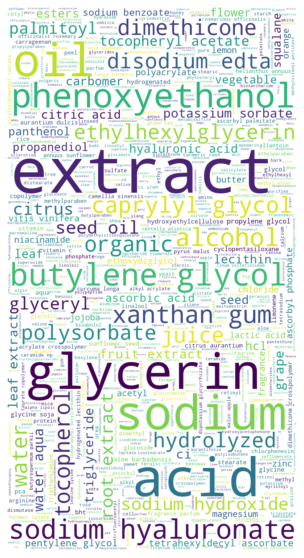

In [64]:
words = " ".join(str(v) for v in df_csv['AllIngredients'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()



In [66]:
df_csv.columns

Index(['Brand', 'ProductName', 'Size', 'PriceInDollars', 'Rating',
       'ApplicationArea', 'SkinType', 'IdealForConcerns', 'Preferences',
       'MainIngredients', 'AllIngredients', 'HowToUse'],
      dtype='object')

<AxesSubplot:>

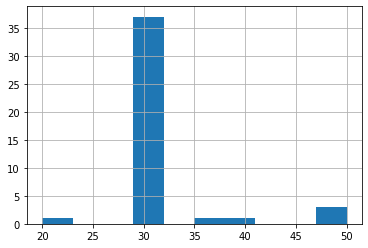

In [85]:
df_csv.Size.hist()

<AxesSubplot:>

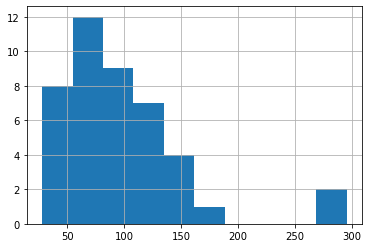

In [86]:
df_csv.PriceInDollars.hist()

<AxesSubplot:>

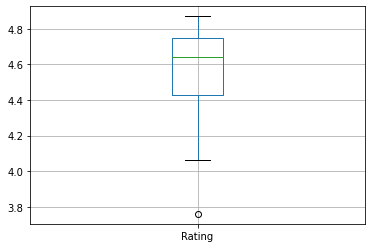

In [75]:
df_csv.boxplot(column = 'Rating')

In [78]:
df_csv[['Size','Rating','PriceInDollars']].corr()

,Size,Rating,PriceInDollars
Size,1.000000,-0.289827,-0.173700
Rating,-0.289827,1.000000,0.274012
PriceInDollars,-0.173700,0.274012,1.000000


<AxesSubplot:>

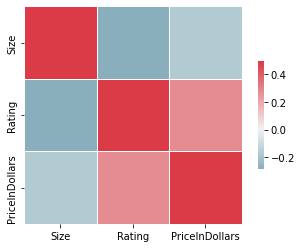

In [84]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df_csv[['Size','Rating','PriceInDollars']].corr(),vmax=.5, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})